#### 4. 붓꽃 품종 예측 프로그램
- 붓꽃 데이터 세트를 이용하여 꽃받침 길이와 너비, 꽃잎의 길이와 너비 등 4 가지 특징을 입력으로 받아서 어떤 붓꽃인지 예측하자.  
- 케라스로 심층신경망을 구현하고 훈련하여 테스트 하시오.



In [1]:
# install dependencies
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

# data load 
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train))  # 3개의 클래스 존재 


(120, 4)
(30, 4)
[0 1 2]


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 모델생성 
model = tf.keras.Sequential([
    Dense(64, input_shape=(4, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') # 3개의 클래스로 분류
])

model.compile(optimizer=Adam(0.003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

print(f"loss, acc : {model.evaluate(X_test, y_test)}")


1/1 [==============================] - 0s 18ms/step - loss: 0.0777 - accuracy: 1.0000
loss, acc : [0.07769744843244553, 1.0]


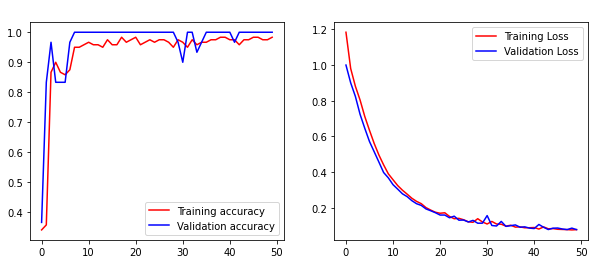

In [3]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label = 'Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label = 'Training Loss')
    plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()


In [4]:
# test set으로 예측
predictions = model.predict(X_test, verbose=0)  # 확률값 
pred_class = [np.argmax(y, axis=None, out=None) for y in predictions]  # 확률값이 큰 클래스로 예측 

print(f'예측값 : {pred_class}')
print(f'정답 : {y_test}')
print()

acc = np.sum(pred_class == y_test) / y_test.shape[0]  # test sample 중에 맞은 샘플 개수 비율 
print(f'accuracy : {acc}')


예측값 : [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
정답 : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

accuracy : 1.0
